# Riskfolio-Lib Tutorial: 
<br>__[Financionerioncios](https://financioneroncios.wordpress.com)__
<br>__[Orenji](https://www.orenj-i.net)__
<br>__[Riskfolio-Lib](https://riskfolio-lib.readthedocs.io/en/latest/)__
<br>__[Dany Cajas](https://www.linkedin.com/in/dany-cajas/)__
<a href='https://ko-fi.com/B0B833SXD' target='_blank'><img height='36' style='border:0px;height:36px;' src='https://cdn.ko-fi.com/cdn/kofi1.png?v=2' border='0' alt='Buy Me a Coffee at ko-fi.com' /></a> 

## Tutorial 23: Dollar Neutral Portfolios

## 1. Downloading the data:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import warnings

warnings.filterwarnings("ignore")
pd.options.display.float_format = '{:.4%}'.format

# Date range
start = '2016-01-01'
end = '2019-12-30'

# Tickers of assets
assets = ['JCI', 'TGT', 'CMCSA', 'CPB', 'MO', 'APA', 'MMC', 'JPM',
          'ZION', 'PSA', 'BAX', 'BMY', 'LUV', 'PCAR', 'TXT', 'TMO',
          'DE', 'MSFT', 'HPQ', 'SEE', 'VZ', 'CNP', 'NI', 'T', 'BA']
assets.sort()

# Downloading data
data = yf.download(assets, start = start, end = end)
data = data.loc[:,('Adj Close', slice(None))]
data.columns = assets

[*********************100%***********************]  25 of 25 completed


In [2]:
# Calculating returns

Y = data[assets].pct_change().dropna()

display(Y.head())

,APA,BA,BAX,BMY,CMCSA,CNP,CPB,DE,HPQ,JCI,...,NI,PCAR,PSA,SEE,T,TGT,TMO,TXT,VZ,ZION
Date,,,,,,,,,,,,,,,,,,,,,
2016-01-05,-2.0257%,0.4057%,0.4035%,1.9693%,0.0180%,0.9305%,0.3678%,0.5783%,0.9483%,-1.1953%,...,1.5881%,0.0212%,2.8236%,0.9758%,0.6987%,1.7539%,-0.1730%,0.2409%,1.3735%,-1.0857%
2016-01-06,-11.4863%,-1.5879%,0.2412%,-1.7557%,-0.7727%,-1.2473%,-0.1736%,-1.1239%,-3.5867%,-0.9551%,...,0.5547%,0.0212%,0.1592%,-1.5647%,-0.1466%,-1.0155%,-0.7653%,-3.0048%,-0.9034%,-2.9145%
2016-01-07,-5.1389%,-4.1922%,-1.6573%,-2.7699%,-1.1047%,-1.9769%,-1.2207%,-0.8855%,-4.6058%,-2.5394%,...,-2.2066%,-3.0309%,-1.0411%,-3.1557%,-1.6148%,-0.2700%,-2.2844%,-2.0570%,-0.5492%,-3.0020%
2016-01-08,0.2736%,-2.2705%,-1.6037%,-2.5425%,0.1099%,-0.2241%,0.5707%,-1.6402%,-1.7642%,-0.1649%,...,-0.1539%,-1.1366%,-0.7308%,-0.1448%,0.0895%,-3.3839%,-0.1117%,-1.1387%,-0.9719%,-1.1254%
2016-01-11,-4.3384%,0.1693%,-1.6851%,-1.0215%,0.0915%,-1.1791%,0.5674%,0.5287%,0.6616%,0.0330%,...,1.6436%,0.0000%,0.9869%,-0.1450%,1.2224%,1.4570%,0.5366%,-0.4607%,0.5800%,-1.9919%


## 2. Mean Risk Dollar Neutral Portfolios

To calculate dollar neutral portfolios we have to solve the following problem:

$$
\begin{aligned}
& \max_{w} & & \mu w \\
& & & \sum^{N}_{i=1} w_{i} = 0 \\
& & & \phi(w) \leq \overline{\phi} \\
& & & \sum^{N}_{i=1} \max(w_{i},0) \leq W^{L} \\
& & & \sum^{N}_{i=1} -\min(w_{i},0) \leq W^{S} \\
& & & W^{S} \leq w \leq W^{L}\\
\end{aligned}
$$

Where $\mu$ is the mean vector, $w$ are the portfolio weights, $\phi(w)$ is a convex risk function, $\overline{\phi}$ is an upper bound for the risk function, $W^{L}$ is the upper bound of positive weights and $W^{S}$ is the upper bound of negative weights.

## 3. Dollar Neutral Portfolio with a Constraint on Standard Deviation

### 3.1 Calculating Dollar Neutral Portfolio

In [3]:
import riskfolio as rp

# Building the portfolio object
port = rp.Portfolio(returns=Y)

# Calculating optimal portfolio

# Select method and estimate input parameters:

method_mu='hist' # Method to estimate expected returns based on historical data.
method_cov='hist' # Method to estimate covariance matrix based on historical data.

port.assets_stats(method_mu=method_mu, method_cov=method_cov, d=0.94)

# Market neutral constraints:

port.sht = True # Allows short positions
port.uppersht = 1 # Upper bound for sum of negative weights
port.upperlng = 1 # Upper bound for sum of positive weights
port.budget = 0 # Sum of all weights
port.upperdev = 0.20/252**0.5 # Upper bound for daily standard deviation

# Estimate optimal portfolio:

model='Classic' # Could be Classic (historical), BL (Black Litterman), FM (Factor Model)
                # or BL_FM (Black Litterman with Factor Model)
rm = 'MV' # Risk measure used, this time will be variance
obj = 'MaxRet' # For Market Neutral the objective must be
hist = True # Use historical scenarios for risk measures that depend on scenarios
rf = 0 # Risk free rate
l = 3 # Risk aversion factor, only useful when obj is 'Utility'

w = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)

print("Sum weights : ", np.round(np.sum(w.to_numpy()),4))
display(w.T)

Sum weights :  -0.0


,APA,BA,BAX,BMY,CMCSA,CNP,CPB,DE,HPQ,JCI,...,NI,PCAR,PSA,SEE,T,TGT,TMO,TXT,VZ,ZION
weights,-25.2748%,11.0539%,0.0000%,-0.1656%,0.0000%,0.0000%,-0.0000%,3.2912%,0.0000%,-0.0000%,...,-0.0000%,0.0000%,-39.6451%,-23.1012%,-0.0000%,0.0000%,0.0000%,-3.3423%,-0.0000%,0.0000%


### 3.2 Plotting portfolio composition

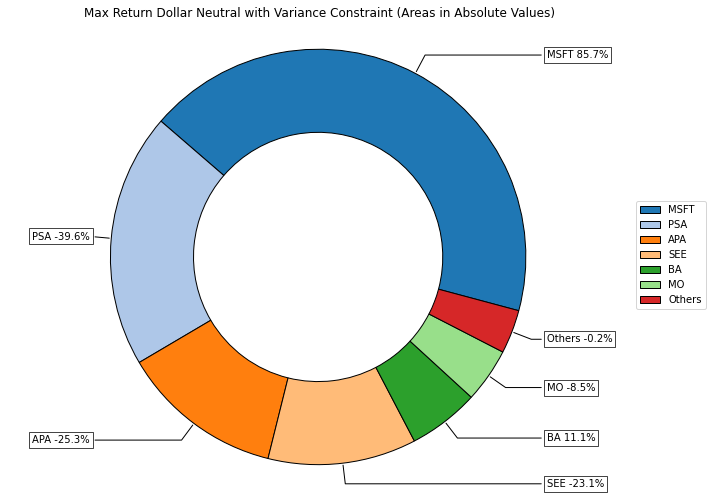

In [4]:
# Plotting the composition of the portfolio

title = "Max Return Dollar Neutral with Variance Constraint"
ax = rp.plot_pie(w=w,
                 title=title,
                 others=0.05,
                 nrow=25,
                 cmap = "tab20",
                 height=7,
                 width=10,
                 ax=None)

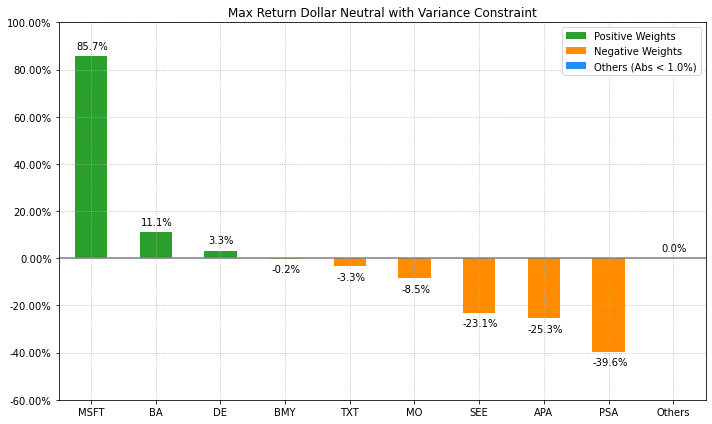

In [5]:
# Plotting the composition of the portfolio using bar chart

ax = rp.plot_bar(w,
                 title="Max Return Dollar Neutral with Variance Constraint",
                 kind="v",
                 others=0.05,
                 nrow=25,
                 height=6,
                 width=10)

### 3.3 Calculating efficient frontier

In [6]:
points = 50 # Number of points of the frontier
port.upperdev = None # Deleting the upper bound for daily standard deviation

frontier = port.efficient_frontier(model=model, rm=rm, points=points, rf=rf, hist=hist)

display(frontier)

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
APA,0.0000%,-0.7286%,-1.4573%,-2.1859%,-2.9146%,-3.6432%,-4.3719%,-5.1005%,-5.8291%,-6.5578%,...,-78.6981%,-81.2198%,-83.6915%,-86.1195%,-88.5086%,-90.8632%,-93.1868%,-95.4824%,-97.7527%,-100.0000%
BA,0.0000%,1.0009%,2.0017%,3.0026%,4.0035%,5.0043%,6.0052%,7.0061%,8.0069%,9.0078%,...,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%
BAX,0.0000%,0.7362%,1.4723%,2.2085%,2.9447%,3.6809%,4.4171%,5.1532%,5.8894%,6.6256%,...,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%
BMY,0.0000%,-1.0131%,-2.0263%,-3.0394%,-4.0526%,-5.0657%,-6.0789%,-7.0920%,-8.1052%,-9.1183%,...,-0.0000%,-0.0000%,-0.0000%,-0.0000%,-0.0000%,-0.0000%,-0.0000%,-0.0000%,-0.0000%,-0.0000%
CMCSA,0.0000%,-0.0535%,-0.1070%,-0.1605%,-0.2140%,-0.2675%,-0.3210%,-0.3745%,-0.4280%,-0.4815%,...,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%
CNP,0.0000%,0.9077%,1.8154%,2.7231%,3.6308%,4.5385%,5.4461%,6.3539%,7.2615%,8.1692%,...,-0.0000%,-0.0000%,-0.0000%,-0.0000%,-0.0000%,-0.0000%,-0.0000%,-0.0000%,-0.0000%,0.0000%
CPB,0.0000%,-0.2849%,-0.5698%,-0.8547%,-1.1397%,-1.4246%,-1.7095%,-1.9944%,-2.2793%,-2.5642%,...,-0.0000%,-0.0000%,-0.0000%,-0.0000%,-0.0000%,-0.0000%,-0.0000%,-0.0000%,-0.0000%,-0.0000%
DE,0.0000%,0.7483%,1.4967%,2.2450%,2.9934%,3.7417%,4.4901%,5.2384%,5.9868%,6.7351%,...,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%
HPQ,0.0000%,-0.1228%,-0.2457%,-0.3685%,-0.4913%,-0.6141%,-0.7369%,-0.8598%,-0.9825%,-1.1053%,...,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%
JCI,0.0000%,-0.2320%,-0.4639%,-0.6959%,-0.9278%,-1.1598%,-1.3917%,-1.6237%,-1.8556%,-2.0876%,...,-0.0000%,-0.0000%,-0.0000%,-0.0000%,-0.0000%,-0.0000%,-0.0000%,-0.0000%,-0.0000%,-0.0000%


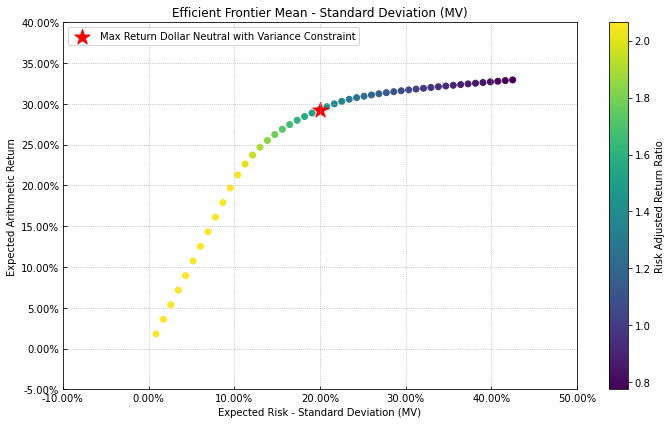

In [7]:
# Plotting the efficient frontier

label = "Max Return Dollar Neutral with Variance Constraint" # Title of point
mu = port.mu # Expected returns
cov = port.cov # Covariance matrix
returns = port.returns # Returns of the assets

ax = rp.plot_frontier(w_frontier=frontier, mu=mu, cov=cov, returns=returns, rm=rm,
                      rf=rf, alpha=0.05, cmap='viridis', w=w, label=label,
                      marker='*', s=16, c='r', height=6, width=10, ax=None)

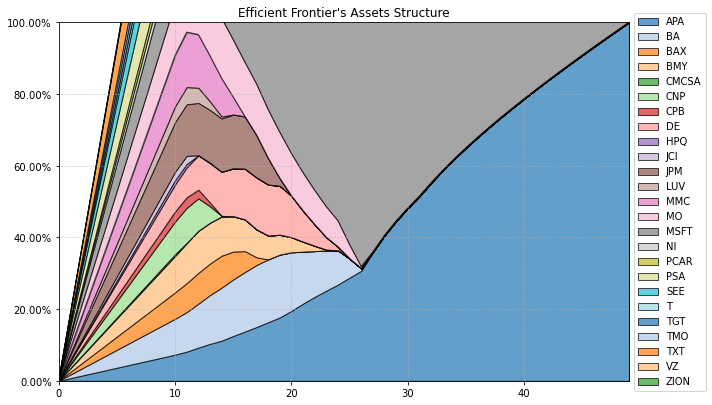

In [8]:
# Plotting efficient frontier composition in absolute values

ax = rp.plot_frontier_area(w_frontier=np.abs(frontier), cmap="tab20", height=6, width=10, ax=None)

## 4. Dollar Neutral Portfolio with a Constraint on CVaR

### 4.1 Calculating Dollar Neutral Portfolio

In [9]:
rm = 'CVaR' # Risk measure
port.upperCVaR = 0.40/252**0.5 # Creating an upper bound for daily CVaR

w = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)

print("Sum weights : ", np.round(np.sum(w.to_numpy()),4))
display(w.T)

Sum weights :  -0.0


,APA,BA,BAX,BMY,CMCSA,CNP,CPB,DE,HPQ,JCI,...,NI,PCAR,PSA,SEE,T,TGT,TMO,TXT,VZ,ZION
weights,-20.6272%,9.9559%,0.0000%,-0.0000%,0.0000%,0.0000%,-0.0000%,12.1175%,0.0000%,-0.0000%,...,-0.0000%,0.0000%,-37.1916%,-21.6283%,-0.0000%,0.0000%,0.0000%,-13.6006%,-0.0000%,0.0000%


### 4.2 Plotting portfolio composition

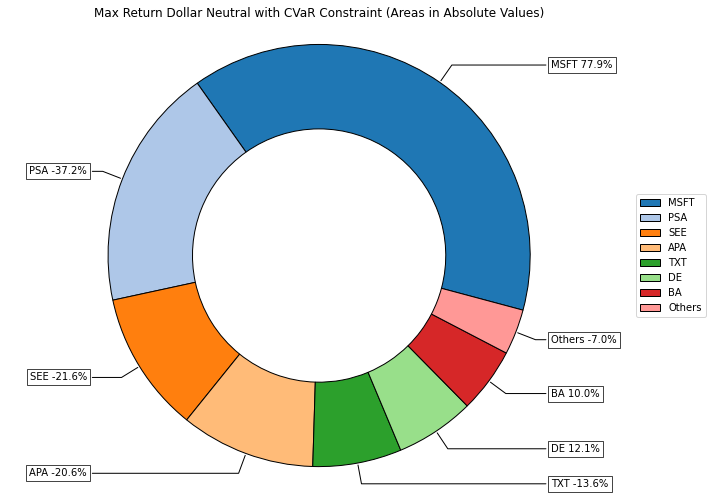

In [10]:
# Plotting the composition of the portfolio

title = "Max Return Dollar Neutral with CVaR Constraint"
ax = rp.plot_pie(w=w,
                 title=title,
                 others=0.05,
                 nrow=25,
                 cmap = "tab20",
                 height=7,
                 width=10,
                 ax=None)

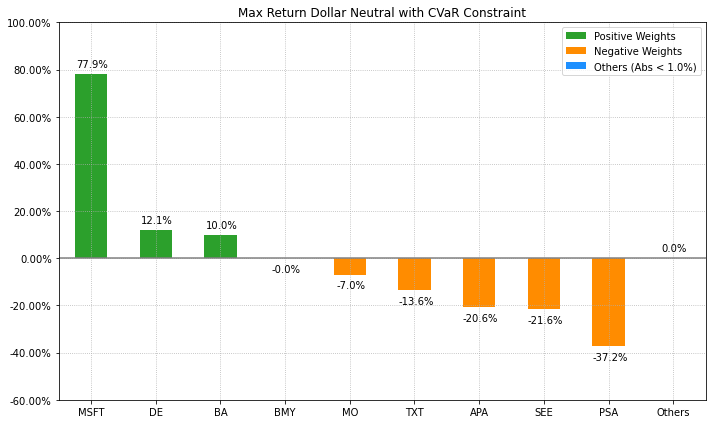

In [11]:
# Plotting the composition of the portfolio using bar chart

ax = rp.plot_bar(w,
                 title="Max Return Dollar Neutral with CVaR Constraint",
                 kind="v",
                 others=0.05,
                 nrow=25,
                 height=6,
                 width=10)

### 4.3 Calculate efficient frontier

In [12]:
points = 50 # Number of points of the frontier
port.upperCVaR = None # Deleting the upper bound for daily CVaR

frontier = port.efficient_frontier(model=model, rm=rm, points=points, rf=rf, hist=hist)

display(frontier.T.head())

,APA,BA,BAX,BMY,CMCSA,CNP,CPB,DE,HPQ,JCI,...,NI,PCAR,PSA,SEE,T,TGT,TMO,TXT,VZ,ZION
0,-0.0000%,0.0000%,0.0000%,-0.0000%,0.0000%,0.0000%,-0.0000%,0.0000%,0.0000%,-0.0000%,...,0.0000%,0.0000%,-0.0000%,-0.0000%,-0.0000%,0.0000%,0.0000%,-0.0000%,0.0000%,0.0000%
1,-0.7633%,0.7791%,1.0025%,-2.2122%,-0.8085%,2.2102%,0.0767%,1.1581%,-0.5450%,-0.6882%,...,0.3308%,0.0397%,-2.1882%,-1.5412%,0.0649%,1.0011%,1.5353%,-2.4237%,0.3146%,0.5367%
2,-1.5266%,1.5581%,2.0050%,-4.4244%,-1.6169%,4.4205%,0.1533%,2.3163%,-1.0899%,-1.3763%,...,0.6617%,0.0794%,-4.3765%,-3.0824%,0.1299%,2.0022%,3.0706%,-4.8474%,0.6292%,1.0735%
3,-2.2899%,2.3372%,3.0075%,-6.6365%,-2.4254%,6.6307%,0.2300%,3.4744%,-1.6349%,-2.0645%,...,0.9925%,0.1191%,-6.5647%,-4.6235%,0.1948%,3.0033%,4.6058%,-7.2711%,0.9439%,1.6102%
4,-3.0531%,3.1162%,4.0100%,-8.8487%,-3.2339%,8.8409%,0.3066%,4.6325%,-2.1798%,-2.7526%,...,1.3233%,0.1588%,-8.7530%,-6.1647%,0.2598%,4.0043%,6.1411%,-9.6948%,1.2585%,2.1470%


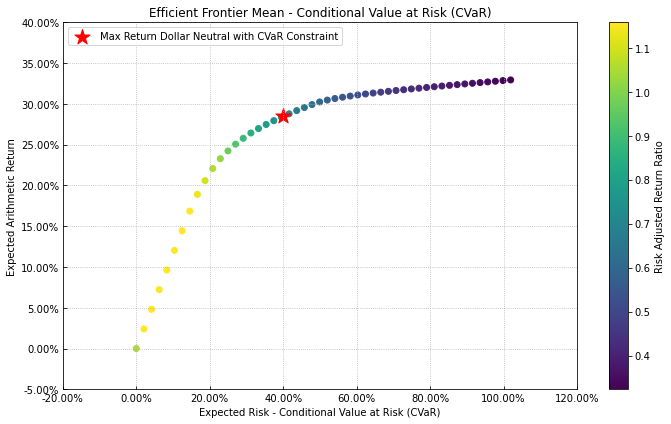

In [13]:
label = "Max Return Dollar Neutral with CVaR Constraint" # Title of point

ax = rp.plot_frontier(w_frontier=frontier, mu=mu, cov=cov, returns=returns, rm=rm,
                      rf=rf, alpha=0.05, cmap='viridis', w=w, label=label,
                      marker='*', s=16, c='r', height=6, width=10, ax=None)

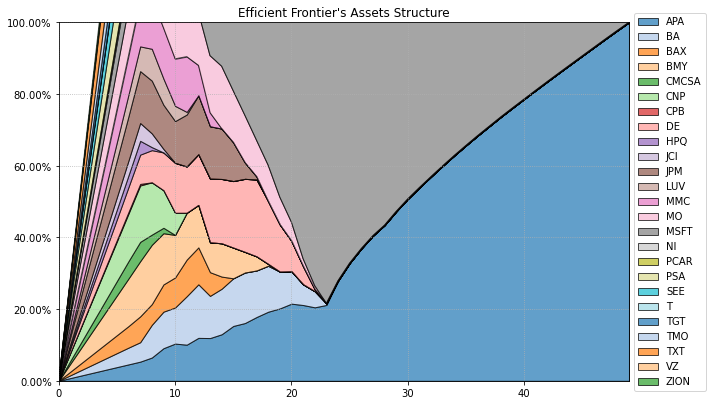

In [14]:
# Plotting efficient frontier composition in absolute values

ax = rp.plot_frontier_area(w_frontier=np.abs(frontier), cmap="tab20", height=6, width=10, ax=None)